# Proyecto Airbnb en Nueva York de Luisa

In [10]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

# Mostrar las primeras fila
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [13]:
print("Shape del dataset:", df.shape)
df.info()

Shape del dataset: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  l

El dataset de Airbnb en Nueva York para 2019 contiene 48,895 registros y 16 variables que describen tanto características del alojamiento como información del anfitrión y actividad del anuncio. De las variables, 10 son numéricas y 6 categóricas, aunque algunas como last_review (tipo object) deberían convertirse a tipo fecha. Se identifican valores faltantes en name (16), host_name (21), y de forma significativa en last_review y reviews_per_month (más de 10,000 nulos), lo que sugiere que muchos anuncios no han recibido reseñas. El dataset incluye variables clave como ubicación (neighbourhood_group, latitude, longitude), tipo de alojamiento (room_type), precio, disponibilidad y número de reseñas, y esto permite explorar patrones de comportamiento y distribución en el mercado de alquileres.

In [14]:
print(df['id'].duplicated().sum())
print(df['name'].duplicated().sum())
print(df['host_id'].duplicated().sum())
print(df['host_name'].duplicated().sum())

0
989
11438
37442


Esto muestra que no hay valores duplicados en la columna id, lo cual es coherente ya que representa un identificador único por anuncio. Sin embargo, hay 989 nombres de alojamiento (name) repetidos, lo que indica que diferentes anuncios pueden compartir el mismo nombre. Además, se identifican 11,438 duplicados en host_id, lo que sugiere que muchos anfitriones gestionan múltiples propiedades. Por último, los 37,442 valores duplicados en host_name refuerzan esta idea, ya que un mismo nombre de anfitrión puede estar asociado a varios anuncios.

In [15]:
try:
    df.drop(["id", "name", "host_name", "last_review", "reviews_per_month", "latitude", "longitude"], axis=1, inplace=True)
    df.head()
except:
    df.info()

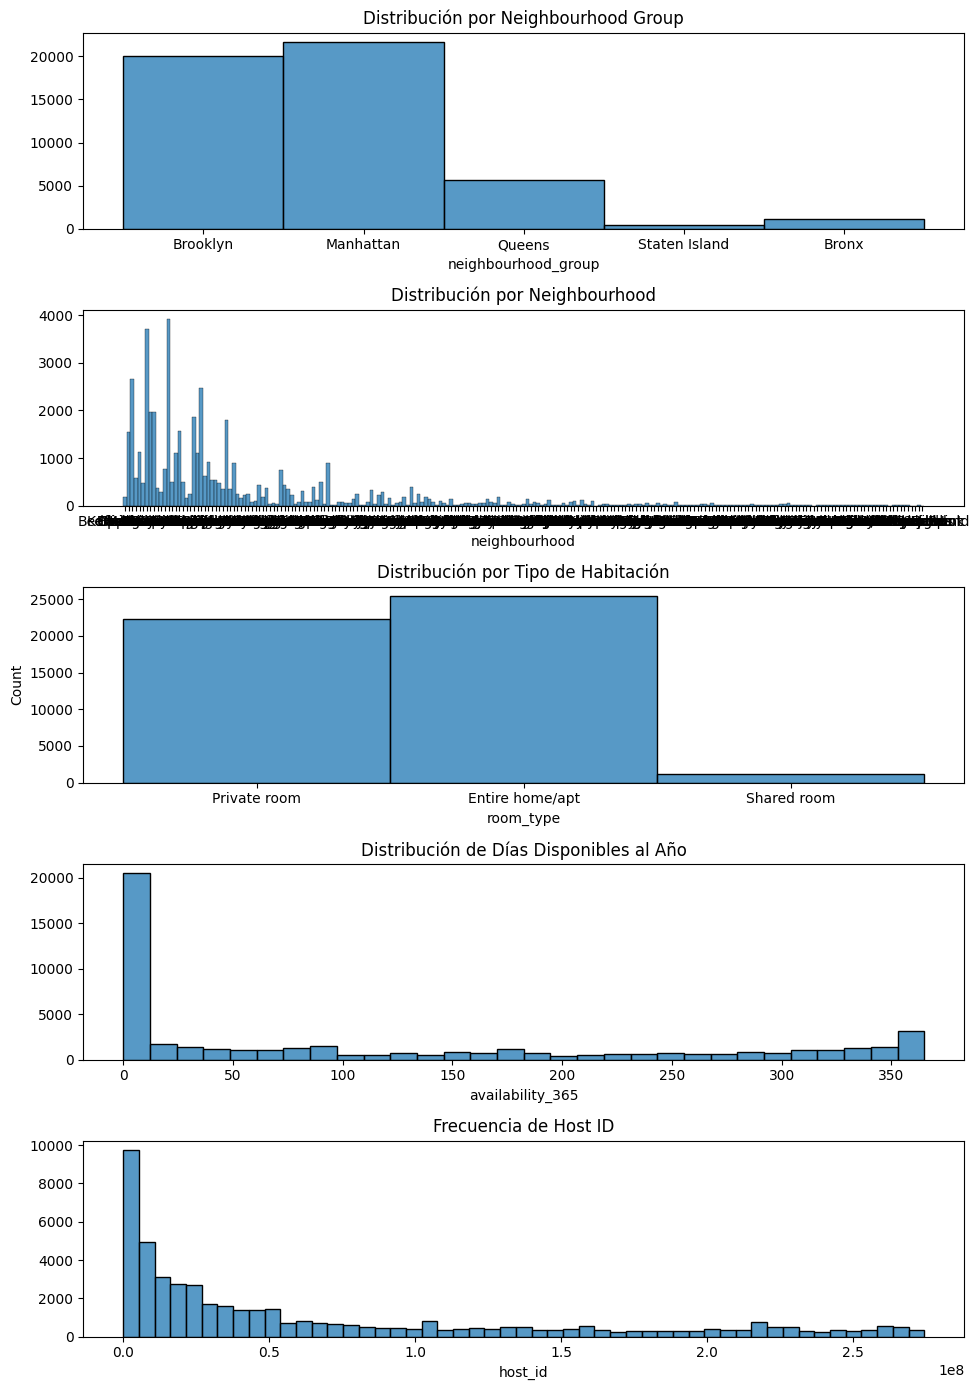

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(5, 1, figsize=(10, 14))

# Histograma del grupo de vecindarios
sns.histplot(ax=axis[0], data=df, x="neighbourhood_group").set(title="Distribución por Neighbourhood Group", ylabel=None)

# Histograma de vecindarios
sns.histplot(ax=axis[1], data=df, x="neighbourhood").set(title="Distribución por Neighbourhood", ylabel=None)

# Histograma del tipo de habitación
sns.histplot(ax=axis[2], data=df, x="room_type").set(title="Distribución por Tipo de Habitación")

# Histograma de disponibilidad
sns.histplot(ax=axis[3], data=df, x="availability_365").set(title="Distribución de Días Disponibles al Año", ylabel=None)

# Histograma de host_id
sns.histplot(ax=axis[4], data=df, x="host_id").set(title="Frecuencia de Host ID", ylabel=None)

plt.tight_layout()
plt.show()


La mayoría de las propiedades se concentran en Brooklyn y Manhattan, con mucha menor representación en Queens, Bronx y especialmente Staten Island. A nivel de vecindarios, la distribución es muy desigual, con ciertos barrios concentrando una gran cantidad de listados, aunque el gráfico resulta poco legible por la cantidad de categorías. En cuanto al tipo de habitación, predominan los departamentos o casas completas y las habitaciones privadas, mientras que las habitaciones compartidas son marginales. La disponibilidad anual muestra una fuerte concentración en valores extremos: muchos listados están disponibles todo el año (365 días) o muy pocos días, lo cual sugiere distintos tipos de anfitriones (ocasionales vs. profesionales). Finalmente, la distribución de host_id revela que la mayoría de anfitriones tienen pocos listados, pero existen algunos con muchos, lo cual podría indicar hosts profesionales o empresas con múltiples propiedades.

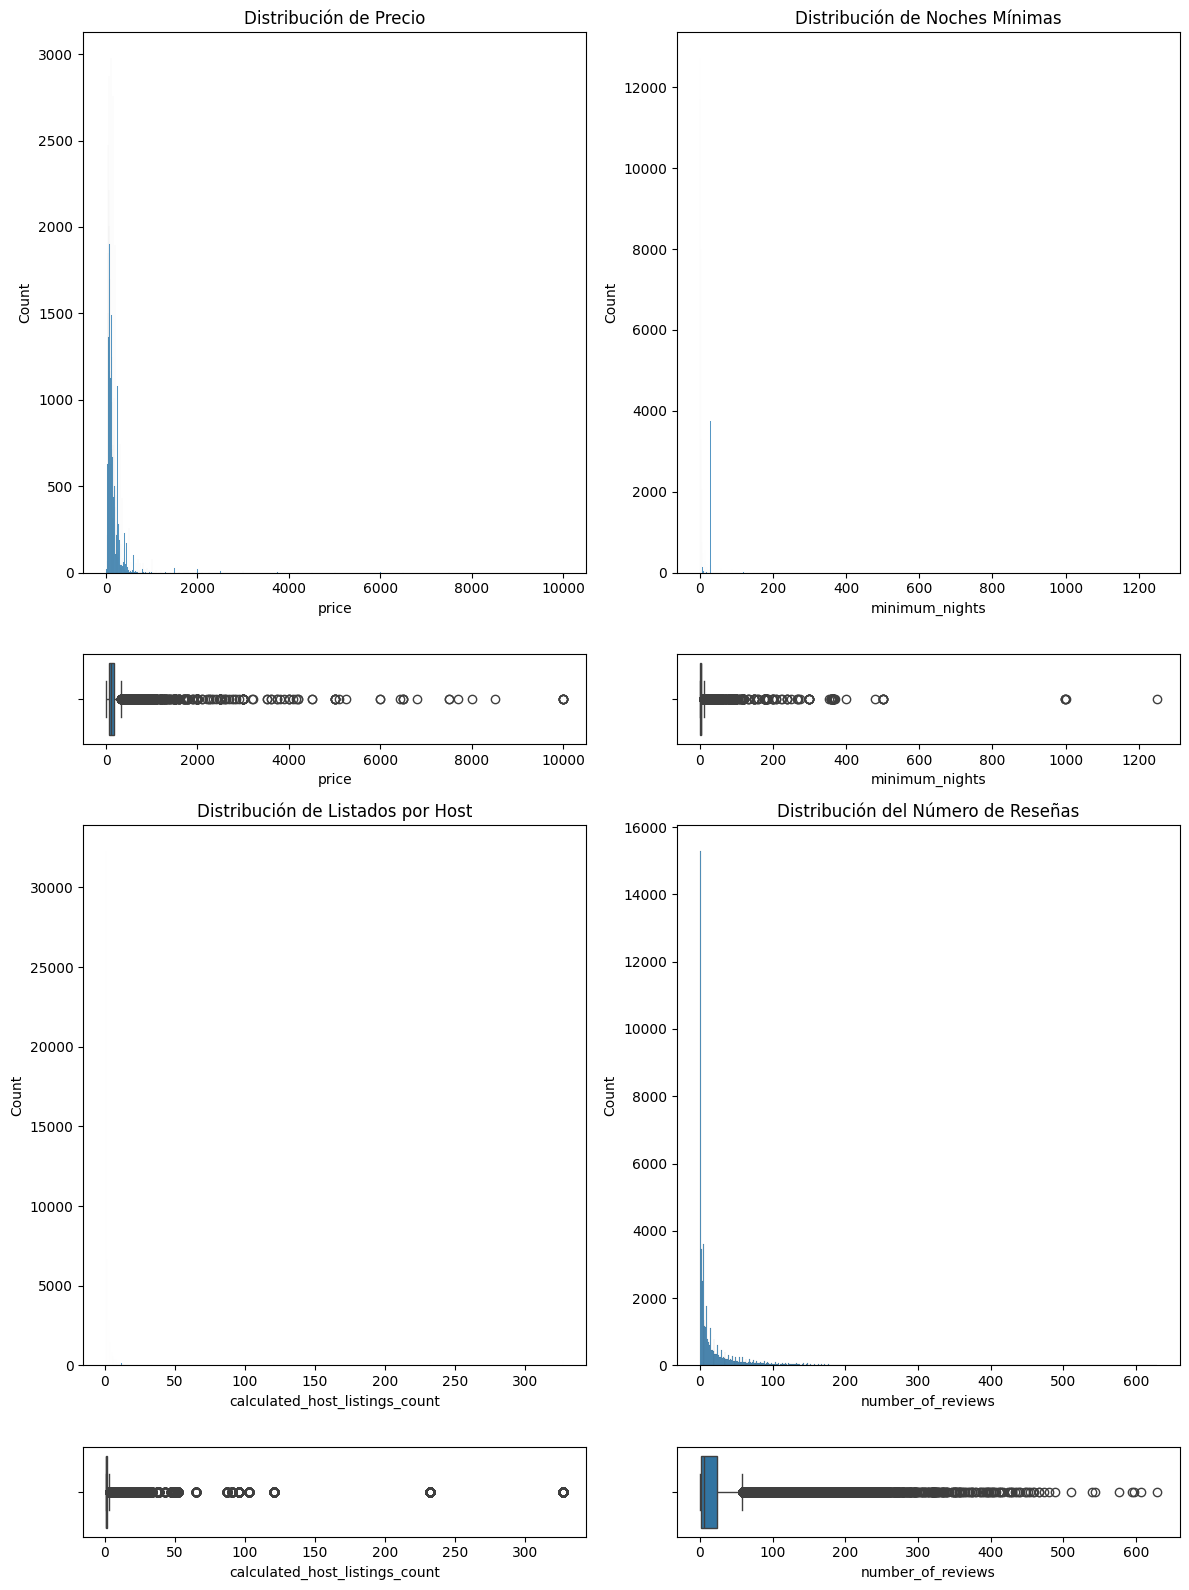

In [ ]:
# Crear figura con 4 filas y 2 columnas, alturas personalizadas
fig, axis = plt.subplots(4, 2, figsize=(12, 16), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Histograma y boxplot del precio
sns.histplot(ax=axis[0, 0], data=df, x="price").set(title="Distribución de Precio")
sns.boxplot(ax=axis[1, 0], data=df, x="price")

# Histograma y boxplot de noches mínimas
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights").set(title="Distribución de Noches Mínimas")
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights")

# Histograma y boxplot del número de listados por host
sns.histplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count").set(title="Distribución de Listados por Host")
sns.boxplot(ax=axis[3, 0], data=df, x="calculated_host_listings_count")

# Histograma y boxplot del número de reseñas
sns.histplot(ax=axis[2, 1], data=df, x="number_of_reviews").set(title="Distribución del Número de Reseñas")
sns.boxplot(ax=axis[3, 1], data=df, x="number_of_reviews")

plt.tight_layout()
plt.show()

Las gráficas muestran una fuerte asimetría positiva en todas las variables analizadas, con distribuciones sesgadas hacia la derecha, lo que indica la presencia de valores atípicos o extremos. En la mayoría de los casos, como en el precio, número mínimo de noches, número de reseñas y cantidad de listados por anfitrión, la mayoría de los datos se concentran cerca de valores bajos, mientras que existen algunos valores muy altos que distorsionan la escala y afectan la visibilidad de la distribución general. Esto se refleja claramente en los boxplots, que muestran numerosos outliers por encima del rango intercuartílico. Estos patrones sugieren la necesidad de aplicar transformaciones (como logaritmos) o técnicas de limpieza para mejorar la interpretación estadística y visual del conjunto de datos.

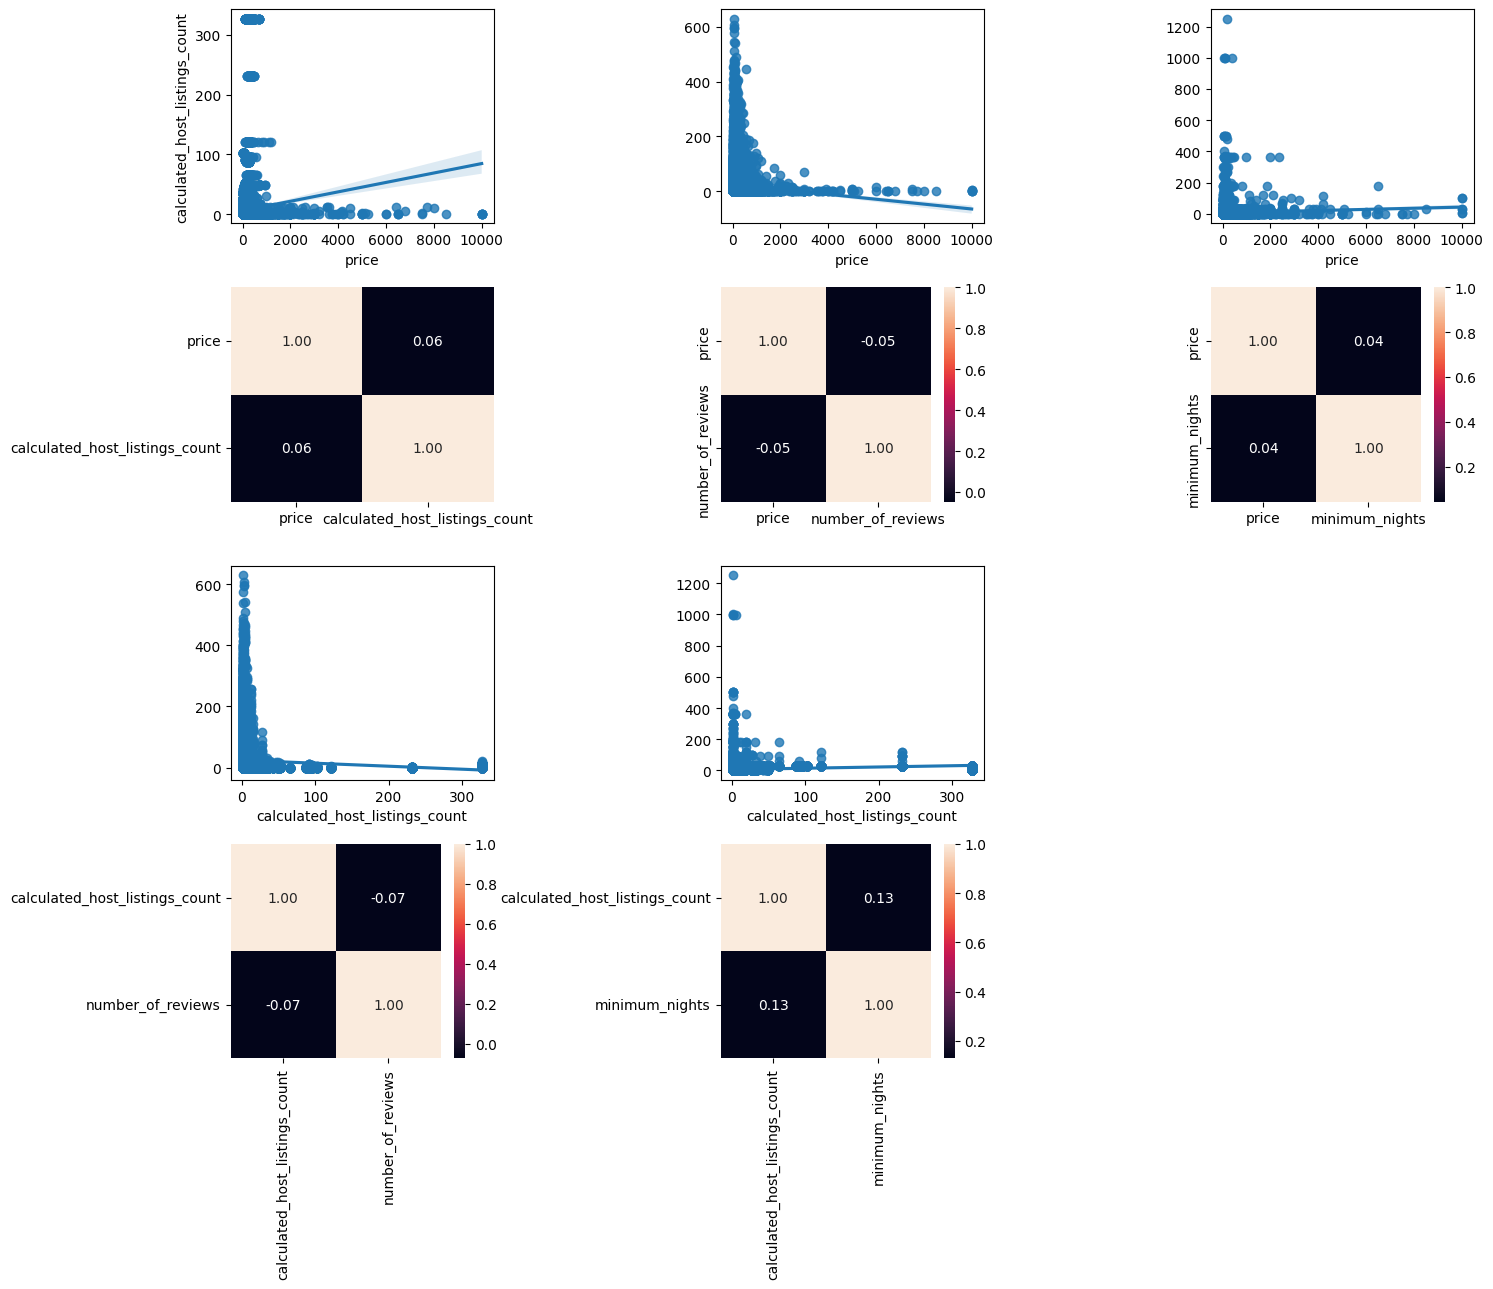

In [ ]:
# Crear una figura con 4 filas y 3 columnas
fig, axis = plt.subplots(4, 3, figsize=(15, 13))

# price vs calculated_host_listings_count
sns.regplot(ax=axis[0, 0], data=df, x="price", y="calculated_host_listings_count")
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# price vs number_of_reviews
sns.regplot(ax=axis[0, 1], data=df, x="price", y="number_of_reviews").set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# price vs minimum_nights
sns.regplot(ax=axis[0, 2], data=df, x="price", y="minimum_nights").set(ylabel=None)
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2])

# calculated_host_listings_count vs number_of_reviews
sns.regplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count", y="number_of_reviews").set(ylabel=None)
sns.heatmap(df[["calculated_host_listings_count", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])

# calculated_host_listings_count vs minimum_nights
sns.regplot(ax=axis[2, 1], data=df, x="calculated_host_listings_count", y="minimum_nights").set(ylabel=None)
sns.heatmap(df[["calculated_host_listings_count", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1])

# Eliminar el último subplot vacío (posición [2,2] y [3,2])
fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()

Las gráficas muestran relaciones entre variables clave del mercado de alquileres en Nueva York. En general, las correlaciones entre estas variables son bajas, lo que sugiere que no existe una relación lineal fuerte entre ellas. La relación entre el precio y las demás variables es débil: apenas hay una leve correlación positiva con la cantidad de listados por anfitrión (0.06) y mínima con las noches mínimas requeridas (0.04), mientras que con el número de reseñas hay una ligera correlación negativa (-0.05). La correlación entre la cantidad de listados por anfitrión y las noches mínimas es más notable (0.13), aunque aún débil. En los diagramas de dispersión se observa una concentración de datos cerca de los valores bajos, especialmente para precios, noches mínimas y reseñas, indicando la presencia de muchos valores atípicos o extremos que podrían estar afectando el análisis. Estos patrones sugieren un mercado heterogéneo con alta variabilidad en las prácticas de los anfitriones y preferencias de los usuarios.

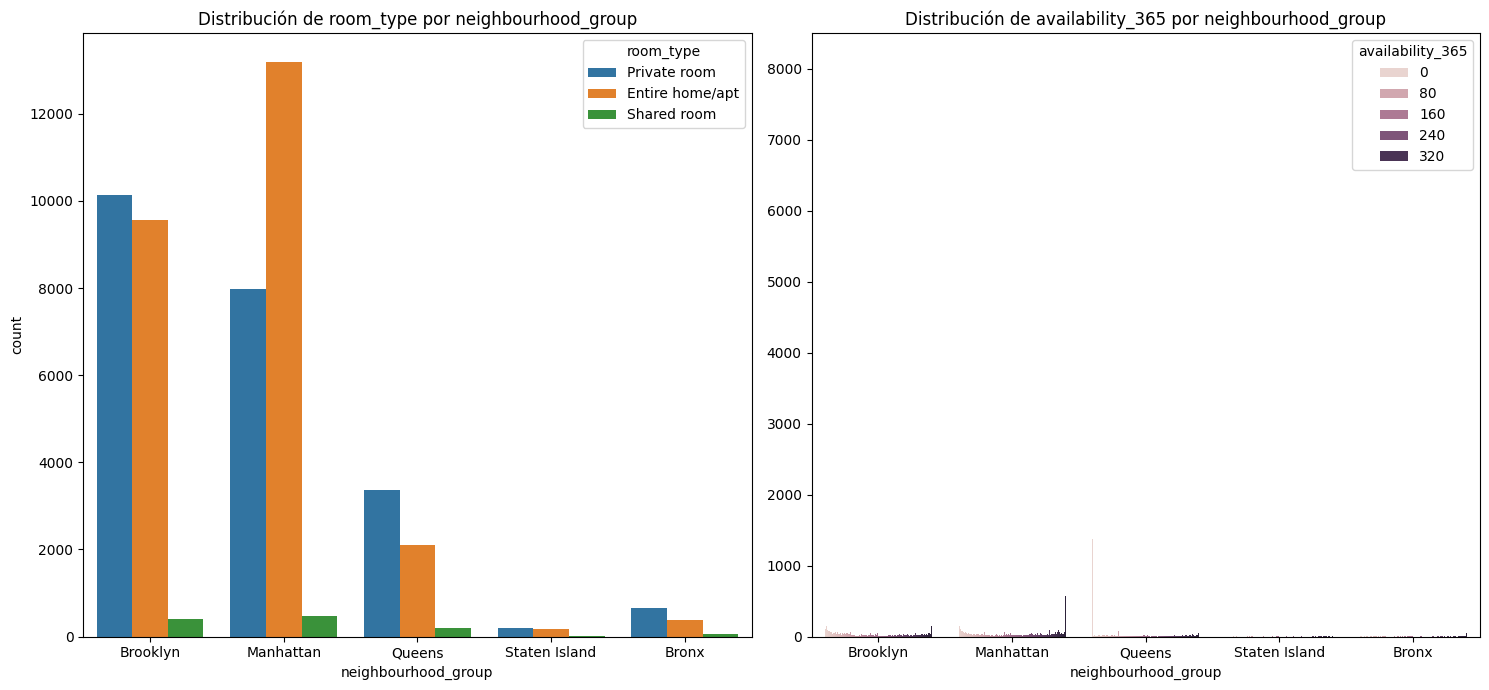

In [ ]:
# Crear
fig, axis = plt.subplots(1, 2, figsize=(15, 7))

# Primer gráfico: 'neighbourhood_group' por 'room_type'
sns.countplot(ax=axis[0], data=df, x="neighbourhood_group", hue="room_type")
axis[0].set_title("Distribución de room_type por neighbourhood_group")

# Segundo gráfico: 'neighbourhood_group' por 'availability_365'
sns.countplot(ax=axis[1], data=df, x="neighbourhood_group", hue="availability_365")
axis[1].set_title("Distribución de availability_365 por neighbourhood_group")
axis[1].set(ylabel=None)

# Ajustar el diseño 
plt.tight_layout()

plt.show()

Se muestra que en Brooklyn y Manhattan se concentra la mayor cantidad de alojamientos, siendo los más comunes los "Entire home/apt" en Manhattan y las "Private room" en Brooklyn. Queens sigue en volumen, pero con mucha menos oferta, y Staten Island y el Bronx tienen una participación mínima. En cuanto a la disponibilidad anual (availability_365), aunque hay una alta concentración de valores bajos (principalmente 0 días), hay una dispersión considerable que sugiere que muchos alojamientos no están disponibles todo el año. La visualización también indica que la distribución de disponibilidad es desigual y con picos marcados, lo cual podría estar influido por estrategias de los anfitriones o por estacionalidad.

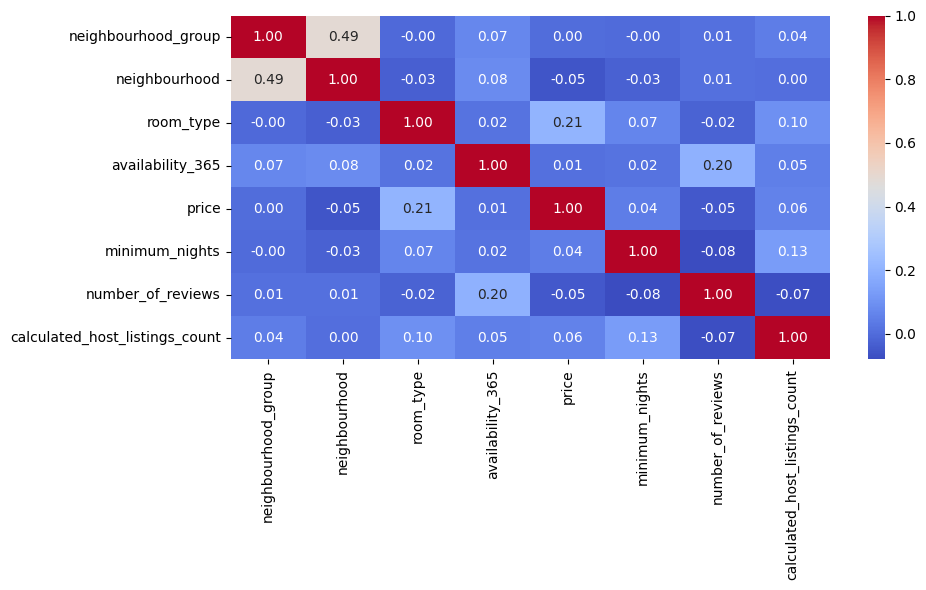

In [24]:
# Factorizar las columnas categóricas
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]
df["room_type"] = pd.factorize(df["room_type"])[0]
df["availability_365"] = pd.factorize(df["availability_365"])[0]

# Crear un gráfico de correlación en un solo subgráfico
fig, axis = plt.subplots(figsize=(10, 6))

# Graficar el heatmap de las correlaciones
sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "availability_365", "price", 
                "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")


plt.tight_layout()

plt.show()

El mapa de calor de correlaciones muestra que en general no existen relaciones fuertes entre las variables del dataset, lo cual sugiere una baja colinealidad. Las correlaciones más destacables son entre neighbourhood_group y neighbourhood (0.49), lo que tiene sentido ya que los vecindarios están contenidos dentro de grupos mayores. También se observa una correlación moderada (0.21) entre room_type y price, indicando que el tipo de habitación influye en el precio, aunque no de forma determinante. Además, la variable availability_365 presenta una leve correlación positiva con el número de reseñas (0.20), lo cual podría indicar que alojamientos disponibles durante más días tienden a recibir más comentarios. 

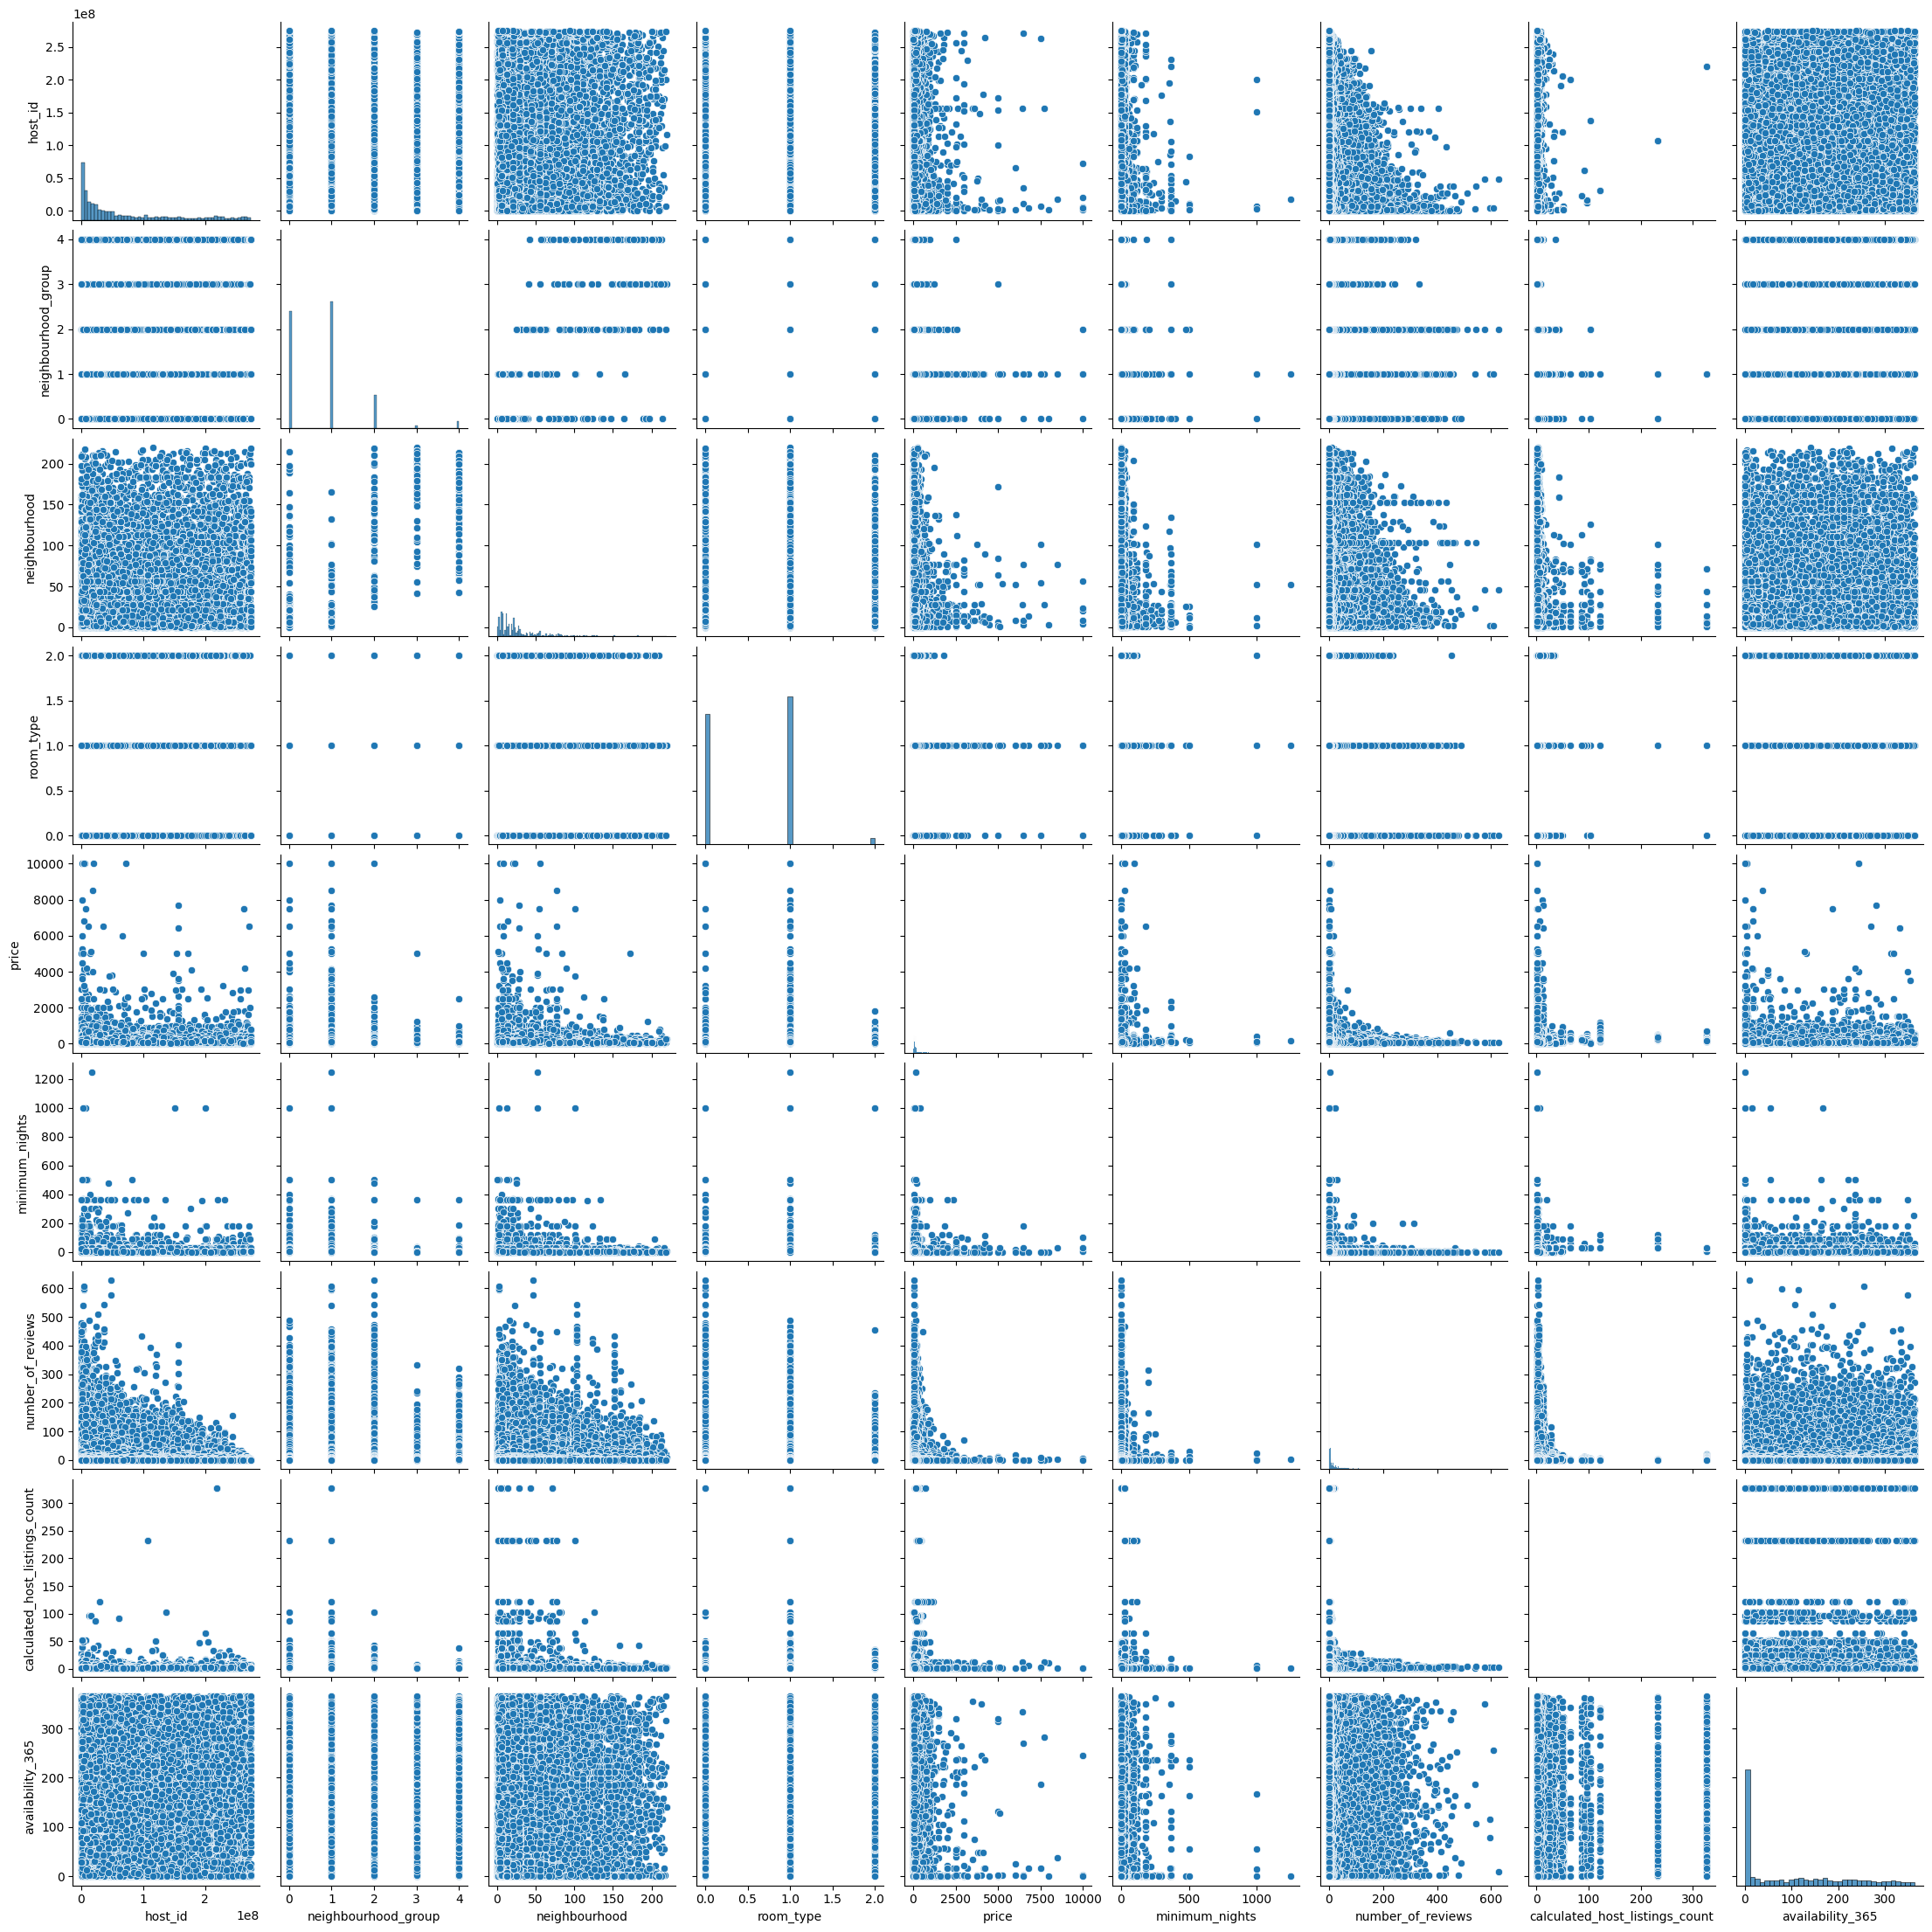

In [25]:
# Crear un pairplot del DataFrame
sns.pairplot(data=df)


plt.show()

Esto revela la presencia de relaciones no lineales y distribuciones altamente sesgadas en varias variables del dataset, especialmente en price, number_of_reviews, availability_365 y calculated_host_listings_count, donde se observa una fuerte concentración de puntos cerca de los valores bajos y la presencia de outliers. En particular, se nota una acumulación significativa de valores en cero para availability_365 y number_of_reviews, lo que sugiere que muchos listados están inactivos o poco activos. Asimismo, price muestra una alta dispersión con algunos valores extremadamente altos que podrían distorsionar el análisis estadístico. 

In [26]:
df.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,104.687166
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,113.507109
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,3.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,60.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,194.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


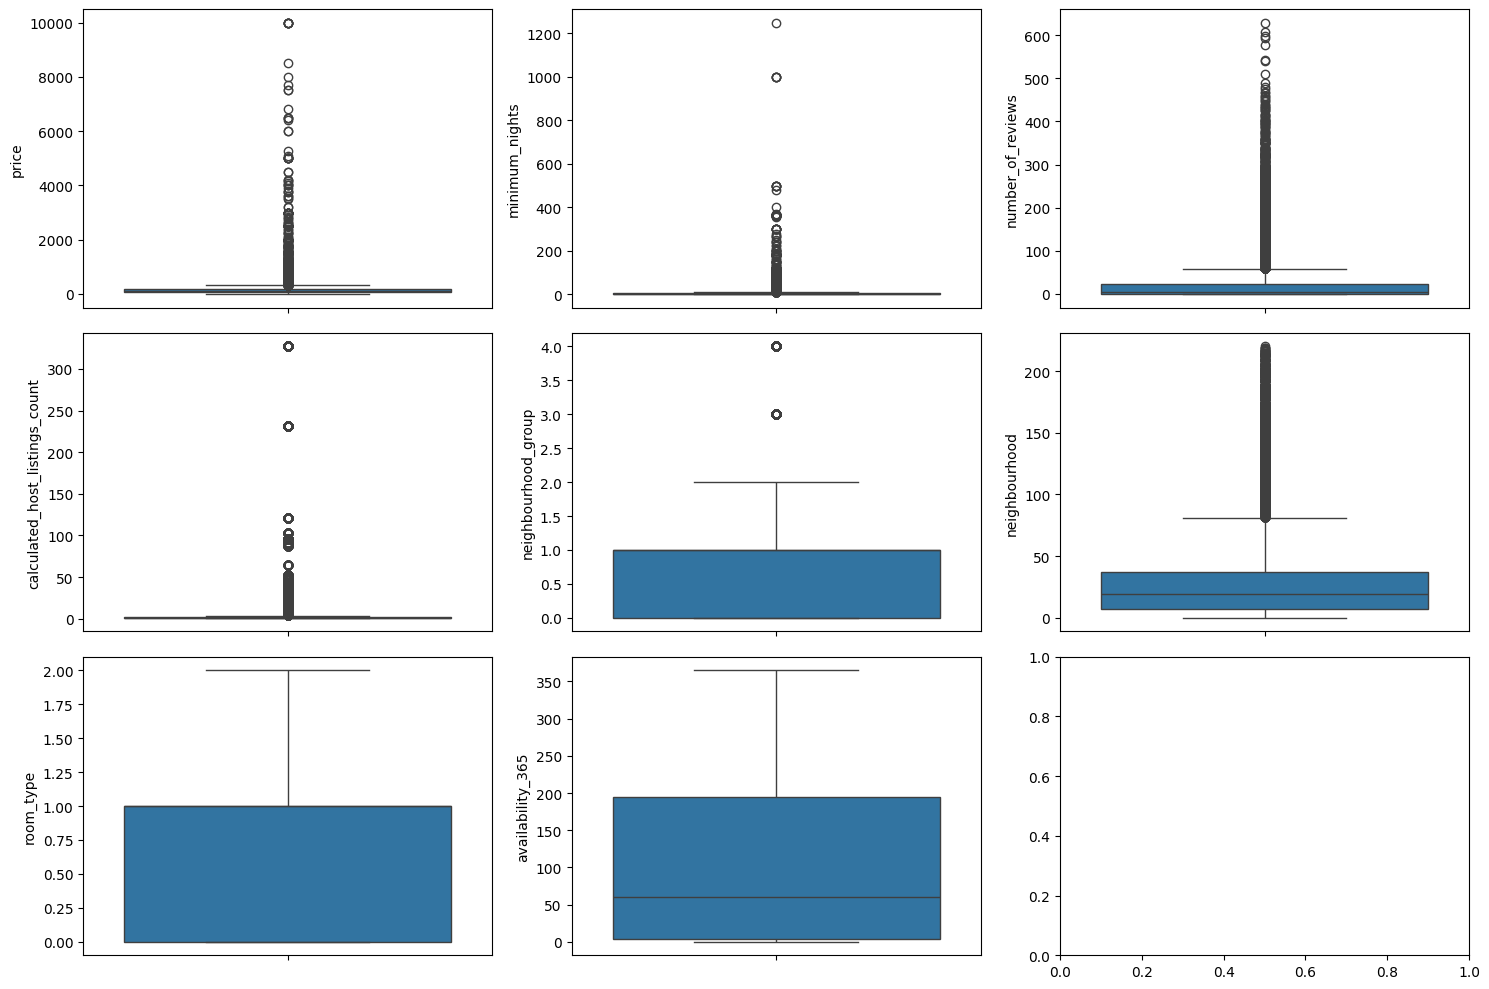

In [28]:
# Crear una figura con subgráficas 3x3
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

# Graficar los boxplots en las posiciones correspondientes
sns.boxplot(ax=axis[0, 0], data=df, y="price")
sns.boxplot(ax=axis[0, 1], data=df, y="minimum_nights")
sns.boxplot(ax=axis[0, 2], data=df, y="number_of_reviews")
sns.boxplot(ax=axis[1, 0], data=df, y="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 1], data=df, y="neighbourhood_group")
sns.boxplot(ax=axis[1, 2], data=df, y="neighbourhood")
sns.boxplot(ax=axis[2, 0], data=df, y="room_type")
sns.boxplot(ax=axis[2, 1], data=df, y="availability_365")


plt.tight_layout()


plt.show()

Se evidencia una fuerte presencia de valores atípicos (outliers) en varias variables clave del conjunto de datos. Particularmente, price, minimum_nights, number_of_reviews y calculated_host_listings_count presentan una gran cantidad de observaciones extremas que se alejan significativamente del rango intercuartílico, lo que puede afectar negativamente a los modelos de análisis si no se tratan adecuadamente. Por otro lado, variables como availability_365 y neighbourhood también muestran una alta dispersión, aunque con una distribución más equilibrada. En contraste, variables categóricas como room_type y neighbourhood_group, al estar codificadas numéricamente, presentan distribuciones discretas con menor presencia de valores extremos.

In [29]:
# Obtener estadísticas descriptivas de la columna 'price'
price_stats = df["price"].describe()

price_stats


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [30]:
# Calcular el IQR (Rango Intercuartil) de 'price'
price_iqr = price_stats["75%"] - price_stats["25%"]

# Calcular los límites superior e inferior para detectar outliers
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

# Imprimir los límites y el IQR
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")


The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [ ]:
# Filtrar las filas donde 'price' es mayor que 334 que nos dio antes
df[df["price"] > 334]


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,60278,1,14,1,375,180,5,1,49
85,74303,0,32,1,800,1,25,1,68
103,93790,1,11,1,500,4,46,2,81
114,72062,1,19,1,350,2,7,4,90
121,119588,0,10,1,400,2,16,2,97
...,...,...,...,...,...,...,...,...,...
48758,73211393,2,25,1,350,2,0,1,17
48833,29741813,1,43,1,475,2,0,1,234
48839,274079964,0,73,0,800,1,0,1,213
48842,224171371,1,14,1,350,1,0,1,76


In [34]:
# Filtrar filas donde 'price' es mayor que 0
df = df[df["price"] > 0]

df["price"]


0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48884, dtype: int64

In [35]:
# Obtener estadísticas descriptivas de la columna 'minimum_nights'
mon_stats = df["minimum_nights"].describe()

mon_stats


count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [36]:
# Calcular el IQR (Rango Intercuartil) de 'minimum_nights'
mon_iqr = mon_stats["75%"] - mon_stats["25%"]

# Calcular los límites superior e inferior para detectar outliers
upper_limit = mon_stats["75%"] + 1.5 * mon_iqr
lower_limit = mon_stats["25%"] - 1.5 * mon_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(mon_iqr, 2)}")


The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [37]:
# Filtrar las filas donde 'minimum_nights' es mayor que 11
df[df["minimum_nights"] > 11]


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
6,7356,0,6,0,60,45,49,1,3
14,11975,1,11,1,120,90,27,1,3
29,21904,1,19,1,180,14,29,1,23
36,7355,0,6,0,35,60,0,1,0
45,49670,0,24,1,150,29,11,1,34
...,...,...,...,...,...,...,...,...,...
48810,274014453,1,8,0,75,30,0,1,236
48843,53966115,0,6,0,45,29,0,2,144
48871,144008701,1,2,0,35,29,0,2,238
48879,540335,0,12,1,120,20,0,1,29


In [40]:
# Filtrar las filas donde 'minimum_nights' es menor o igual a 40 
df[df["minimum_nights"] <= 40]


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,0
1,2845,1,1,1,225,1,45,2,1
2,4632,1,2,0,150,3,0,1,0
3,4869,0,3,1,89,1,270,1,2
4,7192,1,4,1,80,10,9,1,3
...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,0,70,2,0,2,76
48891,6570630,0,21,0,40,4,0,2,203
48892,23492952,1,2,1,115,10,0,1,220
48893,30985759,1,7,2,55,1,0,6,149


In [41]:
# Obtener estadísticas descriptivas de la columna 'minimum_nights'
df["minimum_nights"].describe()


count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
# Obtener estadísticas descriptivas de la columna 'number_of_reviews'
nor_stats = df["number_of_reviews"].describe()

nor_stats


count    48884.000000
mean        23.271991
std         44.551331
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [43]:
# Calcular el IQR (Rango Intercuartil) de 'number_of_reviews'
nor_iqr = nor_stats["75%"] - nor_stats["25%"]

# Calcular los límites superior e inferior para detectar outliers
upper_limit = nor_stats["75%"] + 1.5 * nor_iqr
lower_limit = nor_stats["25%"] - 1.5 * nor_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nor_iqr, 2)}")


The upper and lower limits for finding outliers are 58.5 and -33.5, with an interquartile range of 23.0


In [45]:
# Filtrar las filas donde 'number_of_reviews' es mayor que 60
df[df["number_of_reviews"] > 60]


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3,4869,0,3,1,89,1,270,1,2
5,7322,1,5,1,200,3,74,1,4
7,8967,1,7,0,79,2,430,1,5
8,7490,1,8,0,79,2,118,1,3
9,7549,1,9,1,150,1,160,4,6
...,...,...,...,...,...,...,...,...,...
40104,232251881,2,46,2,40,1,65,8,85
40297,232251881,2,46,0,67,1,95,8,358
40424,232251881,2,46,2,39,1,65,8,46
42075,244361589,1,71,0,100,1,156,9,94


In [46]:
# Obtener estadísticas descriptivas de la columna 'calculated_host_listings_count'
chlc_stats = df["calculated_host_listings_count"].describe()


chlc_stats


count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [47]:
# Calcular el IQR (Rango Intercuartil) de 'calculated_host_listings_count'
chlc_iqr = chlc_stats["75%"] - chlc_stats["25%"]

# Calcular los límites superior e inferior para detectar outliers
upper_limit = chlc_stats["75%"] + 1.5 * chlc_iqr
lower_limit = chlc_stats["25%"] - 1.5 * chlc_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(chlc_iqr, 2)}")


The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [48]:
# Filtrar las filas donde 'number_of_reviews' es mayor que 4
df[df["number_of_reviews"] > 4]


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,0
1,2845,1,1,1,225,1,45,2,1
3,4869,0,3,1,89,1,270,1,2
4,7192,1,4,1,80,10,9,1,3
5,7322,1,5,1,200,3,74,1,4
...,...,...,...,...,...,...,...,...,...
47708,263504959,2,129,0,50,1,6,8,71
47848,269113892,2,46,1,128,1,5,1,322
47967,30461045,1,1,0,125,1,6,1,186
48031,225118276,0,6,0,75,1,7,1,129


In [49]:
# Contar los valores nulos en cada columna y ordenarlos en orden descendente
df.isnull().sum().sort_values(ascending=False)


host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Los resultados muestran que no hay valores nulos en ninguna de las columnas del DataFrame, ya que todas las columnas tienen un total de 0 valores nulos. Esto indica que todos los datos en las columnas host_id, neighbourhood_group, neighbourhood, room_type, price, minimum_nights, number_of_reviews, calculated_host_listings_count y availability_365 están completos y no requieren imputación de valores faltantes.

In [50]:
from sklearn.model_selection import train_test_split

# Definir las variables numéricas
num_variables = ["minimum_nights", "number_of_reviews", "room_type", "calculated_host_listings_count", "availability_365", "neighbourhood"]

# Dividir el dataset en muestras de entrenamiento y prueba
X = df.drop("price", axis = 1)[num_variables]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()


,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
44559,3,6,1,1,122,46
31363,5,5,0,1,3,12
42274,2,7,0,1,296,65
11756,14,1,0,1,3,14
23350,1,0,0,4,3,16


In [60]:
from sklearn.preprocessing import StandardScaler
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador en los datos de entrenamiento
scaler.fit(X_train)

# Normalizar los datos de entrenamiento
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

# Normalizar los datos de prueba
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)


X_train_norm.head()


,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
44559,-0.195648,-0.387428,0.797215,-0.186526,0.155416,0.463360
31363,-0.100454,-0.409856,-1.050292,-0.186526,-0.895165,-0.515932
42274,-0.243245,-0.365000,-1.050292,-0.186526,1.691561,1.010611
11756,0.327918,-0.499567,-1.050292,-0.186526,-0.895165,-0.458326
23350,-0.290842,-0.521995,-1.050292,-0.095097,-0.895165,-0.400721


In [58]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador en los datos de entrenamiento
scaler.fit(X_train)

# Normalizar los datos de entrenamiento
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

# Normalizar los datos de prueba
X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()


,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
44559,0.001601,0.009539,0.5,0.000000,0.334247,0.209091
31363,0.003203,0.007949,0.0,0.000000,0.008219,0.054545
42274,0.000801,0.011129,0.0,0.000000,0.810959,0.295455
11756,0.010408,0.001590,0.0,0.000000,0.008219,0.063636
23350,0.000000,0.000000,0.0,0.009202,0.008219,0.072727


In [59]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 6, seleccionamos las 6 mejores características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train_scal, y_train)

# Obtener las características seleccionadas
ix = selection_model.get_support()

# Transformar los datos de entrenamiento y prueba con las características seleccionadas
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

# Mostrar las primeras filas de los datos seleccionados de entrenamiento
X_train_sel.head()


,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
0,0.001601,0.009539,0.5,0.000000,0.334247,0.209091
1,0.003203,0.007949,0.0,0.000000,0.008219,0.054545
2,0.000801,0.011129,0.0,0.000000,0.810959,0.295455
3,0.010408,0.001590,0.0,0.000000,0.008219,0.063636
4,0.000000,0.000000,0.0,0.009202,0.008219,0.072727


In [61]:
# Mostrar las primeras filas de los datos seleccionados de prueba
X_test_sel.head()


,minimum_nights,number_of_reviews,room_type,calculated_host_listings_count,availability_365,neighbourhood
0,0.008807,0.006359,0.0,0.009202,0.764384,0.063636
1,0.000801,0.174881,0.0,0.009202,0.517808,0.018182
2,0.023219,0.015898,0.5,0.021472,0.739726,0.054545
3,0.000000,0.001590,0.0,0.000000,0.008219,0.136364
4,0.002402,0.000000,0.0,0.003067,0.000000,0.009091


In [62]:
# Agregar la columna 'price' a los datos seleccionados de entrenamiento y prueba
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)


In [63]:
# Guardar los datos seleccionados de entrenamiento y prueba en archivos CSV
X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_nyc_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_nyc_test.csv", index=False)
